# Importing data

In [1]:
import numpy as np
import pandas as pd
try:
    from single_nn import Layer
    from neural_net import neural_network
except:
    from .single_nn import Layer
    from .neural_net import neural_network
import matplotlib.pyplot as plt
import time

In [2]:
train = pd.read_csv("Dataset/mnist_train.csv")
y_train = train['label']
X_train = train.drop("label", 1)
# Normalising data
X_train = X_train / 255
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
test = pd.read_csv("Dataset/mnist_test.csv")
y_test = test['label']
X_test = test.drop("label", 1)
X_test = X_test / 255
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


Some sample data is shown below from the training data.

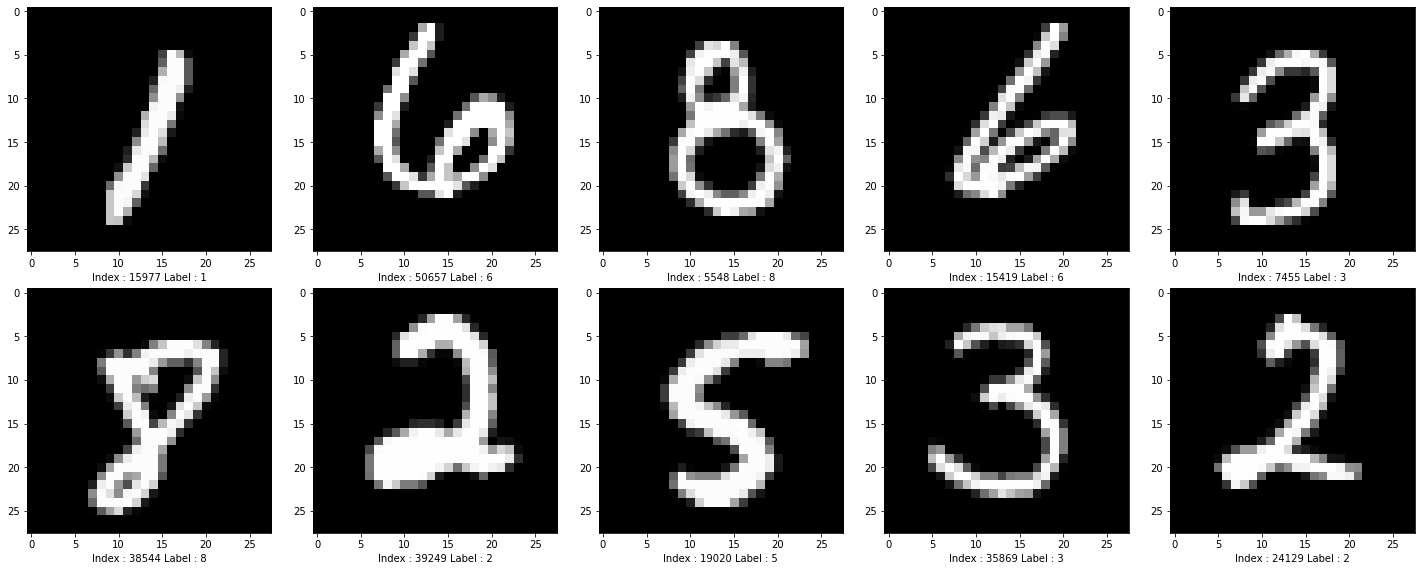

In [4]:
fig = plt.figure(figsize=(20,8))
index = np.random.randint(0, X_train.shape[0]-1, size=10)
for j,i in enumerate(index):
    img = np.array(X_train.iloc[i, :]).reshape(28,28)
    fig.add_subplot(2,5,j+1)
    plt.imshow(img, cmap='gray')
    plt.xlabel("Index : {} Label : {}".format(i, y_train.iloc[i]))
plt.tight_layout()
plt.show()

# Creating Model

In [5]:
model = neural_network([
    Layer(X_train.shape[1], type="input"),
    Layer(32, activation="relu"),
    Layer(32, activation="relu"),
    Layer(10, activation="softmax", type="output")
])

In [6]:
np.array(X_train.T).shape

(784, 60000)

The model creation may take about 45 minutes to train. So sitback and relax.

In [7]:
costs = model.fit(X_train, y_train, n_epochs=1000, verbose=50, learning_rate=0.01, mini_batch_size=128, lambd=0.1)

Cost after 0 epochs is 0.6028906521038624 . Elapsed Time :  4.107496738433838
Cost after 50 epochs is 0.12325320219950402 . Elapsed Time :  129.97752809524536
Cost after 100 epochs is 0.13739005681781014 . Elapsed Time :  128.17751955986023
Cost after 150 epochs is 0.12705955714433873 . Elapsed Time :  124.80405831336975
Cost after 200 epochs is 0.09526461571936812 . Elapsed Time :  118.78302907943726
Cost after 250 epochs is 0.08384864288215832 . Elapsed Time :  111.30335927009583
Cost after 300 epochs is 0.09881338890386814 . Elapsed Time :  112.99596905708313
Cost after 350 epochs is 0.11317667107304599 . Elapsed Time :  116.3299822807312
Cost after 400 epochs is 0.07396090580981095 . Elapsed Time :  116.92910385131836
Cost after 450 epochs is 0.0873586527342451 . Elapsed Time :  116.56306076049805
Cost after 500 epochs is 0.08615479111311308 . Elapsed Time :  111.43685507774353
Cost after 550 epochs is 0.07510391741522174 . Elapsed Time :  124.30025124549866
Cost after 600 epochs i

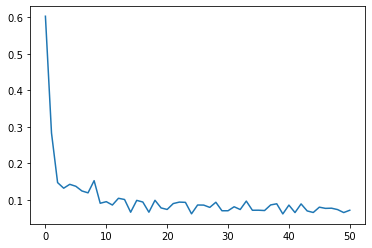

In [8]:
plt.plot(costs)
plt.show()

## Accuracy on Train data

In [9]:
predictions = model.predict(np.array(X_train).T)
model.compute_cost(predictions, np.array(pd.get_dummies(y_train).T))

0.03578591557582491

In [10]:
predict_train = predictions.argmax(axis=0)
accuracy_train = np.mean(predict_train == y_train)
accuracy_train

0.9928333333333333

## Accuracy on Test data

In [11]:
predictions = model.predict(np.array(X_test).T)
model.compute_cost(predictions, np.array(pd.get_dummies(y_test).T))

0.08074182685946932

In [12]:
predict_test = predictions.argmax(axis=0)
accuracy_test = np.mean(predict_test == y_test)
accuracy_test

0.9754

*Modify the index value below to see the prediction for that specific index.*

In [13]:
index = np.random.randint(0, 10000)
predictions = model.predict(np.array(X_test.T[[index]]))
model.compute_cost(predictions, np.array(pd.get_dummies(y_test).T[[index]]))
print("Label of index",index,"is",y_test.loc[index],"and predicted label is",predictions.argmax(axis=0))

Label of index 4613 is 3 and predicted label is [3]


# Adding test data to model

The test data created was to get the accuracy of the model. Now that accuracy is obtained, the test data is run on the model to improve the model more.

In [14]:
# model fitted with append=True to append the model with extra data
test_costs = model.fit(X_test, y_test, n_epochs=200, verbose=10, learning_rate=0.01, mini_batch_size=128, lambd=0.1, append=True)

Cost after 0 epochs is 0.12073620672467493 . Elapsed Time :  0.46703672409057617
Cost after 10 epochs is 0.17918430853208006 . Elapsed Time :  3.855074644088745
Cost after 20 epochs is 0.0901863496598483 . Elapsed Time :  3.927593946456909
Cost after 30 epochs is 0.09271350779150071 . Elapsed Time :  4.165312051773071
Cost after 40 epochs is 0.10178388336316258 . Elapsed Time :  4.016992807388306
Cost after 50 epochs is 0.0913891956889573 . Elapsed Time :  3.9228405952453613
Cost after 60 epochs is 0.09612384923874878 . Elapsed Time :  3.8092844486236572
Cost after 70 epochs is 0.10114577135605768 . Elapsed Time :  4.1139936447143555
Cost after 80 epochs is 0.08172595057694299 . Elapsed Time :  4.021869421005249
Cost after 90 epochs is 0.0982420375850879 . Elapsed Time :  4.056299924850464
Cost after 100 epochs is 0.07885863547509814 . Elapsed Time :  4.073808193206787
Cost after 110 epochs is 0.09409785897129645 . Elapsed Time :  3.8063807487487793
Cost after 120 epochs is 0.081593142

### Final Cross-entropy loss and accuracy

In [20]:
predictions = model.predict(np.array(pd.concat([X_train, X_test])).T)
model.compute_cost(predictions, np.array(pd.get_dummies(pd.concat([y_train, y_test])).T))

0.06668053610142072

In [21]:
predict_test = predictions.argmax(axis=0)
accuracy_test = np.mean(predict_test == pd.concat([y_train, y_test]))
accuracy_test

0.9788571428571429

# Saving model

The final weights and biases formed by training is saved in cache.npy, so that this can be retrieved by using model.retrieve_weights(filename)

In [22]:
model.cache_weights()

Weights and biases saved in file cache.npy
